# 1. Import necessary `python` packages

In [1]:
# Import all relevant packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
from utils import *

# Set parameters of packages
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{bm, amsmath, siunitx}'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['font.size'] = 18

# 2. Tests on generated datasets

## 2.1 Method 1: Sampling from uniform distributions

In [2]:
# Generate dataset using sampling from uniform distributions of various intervals
λ = np.linspace(1, 1000, 1000) # Scale factor array
dataset_m1 = []

for scale_factor in λ:
    uniform_sample = np.random.uniform(low=0.0, high=scale_factor*1.0, size=int(10000/scale_factor))
    dataset_m1.append(uniform_sample)
dataset_m1 = np.concatenate([sub_array for sub_array in dataset_m1])

In [3]:
# Find first digits in dataset
first_digits_m1 = find_first_digits(dataset_m1)

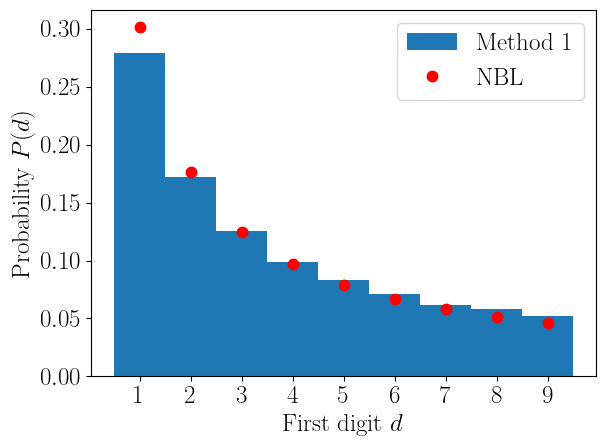

In [4]:
# Calculate Benford curve
x_benford = np.linspace(1, 9, 9)
y_benford = benford(x_benford)

# Plot results
plt.hist(first_digits_m1, bins=np.arange(0.5, 10.5, 1), density=True, align='mid', rwidth=1.0, label='Method 1')
plt.plot(x_benford, y_benford, label='NBL', marker='.', linestyle='None', markersize=15, color='red')
plt.xticks(np.arange(1, 10), labels=[str(i) for i in range(1, 10)])
plt.legend(loc='best')
plt.xlabel('First digit $d$')
plt.ylabel('Probability $P(d)$')
plt.tight_layout()
plt.savefig('gen_method_1.pdf')
plt.show()

 ## 2.2 Method 2: Sampling from a logarithmic uniform distribution

In [5]:
# Generate dataset using sampling from a logarithmic uniform distribution
dataset_m2 = 10**np.random.uniform(low=-10.0, high=10.0, size=100000)

In [6]:
# Find first digits in dataset
first_digits_m2 = find_first_digits(dataset_m2)

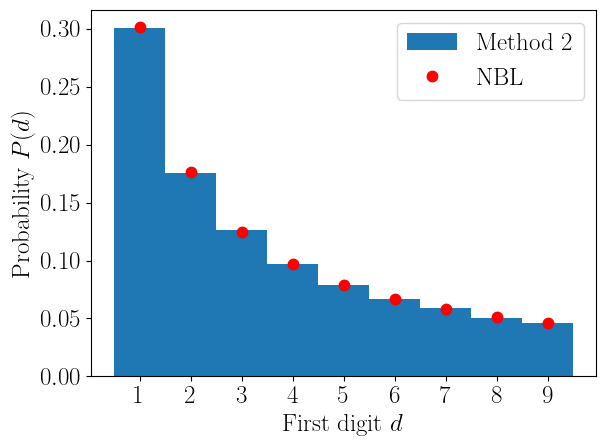

In [7]:
# Calculate Benford curve
x_benford = np.linspace(1, 9, 9)
y_benford = benford(x_benford)

# Plot results
plt.hist(first_digits_m2, bins=np.arange(0.5, 10.5, 1), density=True, align='mid', rwidth=1.0, label='Method 2')
plt.plot(x_benford, y_benford, label='NBL', marker='.', linestyle='None', markersize=15, color='red')
plt.xticks(np.arange(1, 10), labels=[str(i) for i in range(1, 10)])
plt.legend(loc='best')
plt.xlabel('First digit $d$')
plt.ylabel('Probability $P(d)$')
plt.tight_layout()
plt.savefig('gen_method_2.pdf')
plt.show()

# 3. Test on data of world population

In [8]:
# Read the Excel file into a DataFrame
df = pd.read_excel("world_population.xls", sheet_name='Data', skiprows=3)

# Extract current pupulations
curr_pop = np.array(df['2022'])

# Filter NaN values
curr_pop = curr_pop[~np.isnan(curr_pop)]

In [9]:
# Extract all population numbers from 1960 to 2023
pop_1960_2023 = []
for i in df.keys()[4:]:
    pop_1960_2023.append(df[i])
pop_1960_2023 = np.array(pop_1960_2023).flatten()

# filter NaN values
pop_1960_2023 = pop_1960_2023[~np.isnan(pop_1960_2023)]

In [10]:
# Find first digits in datasets
first_digits_curr_pop = find_first_digits(curr_pop)
first_digits_pop_1960_2023 = find_first_digits(pop_1960_2023)

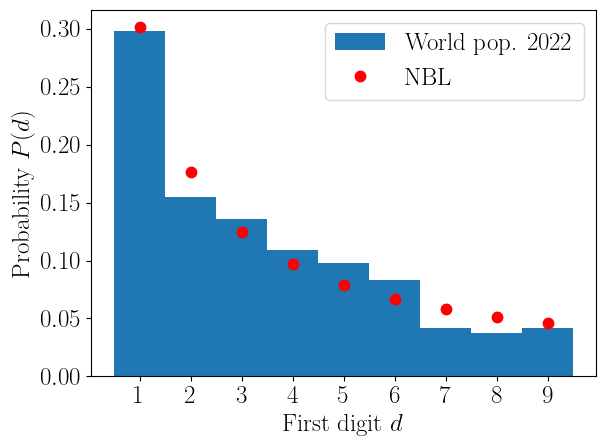

In [11]:
# Calculate Benford curve
x_benford = np.linspace(1, 9, 9)
y_benford = benford(x_benford)

# Plot results
plt.hist(first_digits_curr_pop, bins=np.arange(0.5, 10.5, 1), density=True, align='mid', rwidth=1.0, label='World pop. 2022')
plt.plot(x_benford, y_benford, label='NBL', marker='.', linestyle='None', markersize=15, color='red')
plt.xticks(np.arange(1, 10), labels=[str(i) for i in range(1, 10)])
plt.legend(loc='best')
plt.xlabel('First digit $d$')
plt.ylabel('Probability $P(d)$')
plt.tight_layout()
plt.savefig('pop_2022.pdf')
plt.show()

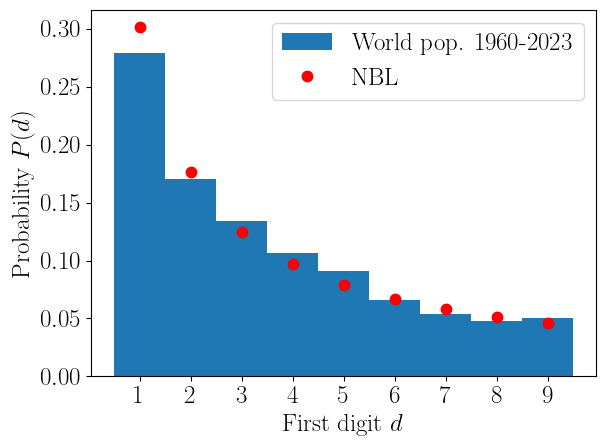

In [12]:
# Calculate Benford curve
x_benford = np.linspace(1, 9, 9)
y_benford = benford(x_benford)

# Plot results
plt.hist(first_digits_pop_1960_2023, bins=np.arange(0.5, 10.5, 1), density=True, align='mid', rwidth=1.0, label='World pop. 1960-2023')
plt.plot(x_benford, y_benford, label='NBL', marker='.', linestyle='None', markersize=15, color='red')
plt.xticks(np.arange(1, 10), labels=[str(i) for i in range(1, 10)])
plt.legend(loc='best')
plt.xlabel('First digit $d$')
plt.ylabel('Probability $P(d)$')
plt.tight_layout()
plt.savefig('pop_1960_2023.pdf')
plt.show()